In [1]:
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
p = open(r'G:\Jupyter\face_webcam_recog\500\train_imgs.pickle', 'rb')
p1 = open(r'G:\Jupyter\face_webcam_recog\500\train_labels.pickle', 'rb')

# Load data from the pickle files
train_imgs = pickle.load(p)
train_labels = pickle.load(p1)

In [3]:
p.close()
p1.close()

In [4]:
print(train_imgs.shape)

(18500, 256, 256, 3)


In [5]:
#train_imgs_np= train_imgs/ 255.0

In [6]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256,256,3)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 256, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 256, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 512, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 512, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 256, activation='relu'),
    tf.keras.layers.Dense(units = 256, activation='relu'),
    tf.keras.layers.Dense(units = 64, activation='relu'),
    tf.keras.layers.Dropout(0.45),
    tf.keras.layers.Dense(units = 37, activation='softmax')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 256)      0

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [8]:
h = model.fit(
    x=train_imgs,
    y=train_labels,
    epochs=100,  # Adjust the number of epochs as needed
    validation_split=0.5,  # Set a suitable validation split
    batch_size=316,  # Adjust the batch size as needed
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],  # Early stopping to prevent overfitting
    verbose=1
)

Epoch 1/100
30/30 [==============================] - 81s 1s/step - loss: 4.1818 - accuracy: 0.0297 - val_loss: 3.6065 - val_accuracy: 0.0304
Epoch 2/100
30/30 [==============================] - 31s 1s/step - loss: 3.6074 - accuracy: 0.0319 - val_loss: 3.6094 - val_accuracy: 0.0289
Epoch 3/100
30/30 [==============================] - 31s 1s/step - loss: 3.6026 - accuracy: 0.0302 - val_loss: 3.5927 - val_accuracy: 0.0359
Epoch 4/100
30/30 [==============================] - 31s 1s/step - loss: 3.5795 - accuracy: 0.0314 - val_loss: 3.5593 - val_accuracy: 0.0324
Epoch 5/100
30/30 [==============================] - 31s 1s/step - loss: 3.5465 - accuracy: 0.0405 - val_loss: 3.4750 - val_accuracy: 0.0621
Epoch 6/100
30/30 [==============================] - 31s 1s/step - loss: 3.4737 - accuracy: 0.0584 - val_loss: 3.3510 - val_accuracy: 0.1028
Epoch 7/100
30/30 [==============================] - 31s 1s/step - loss: 3.3897 - accuracy: 0.0805 - val_loss: 3.2806 - val_accuracy: 0.1307
Epoch 8/100
3

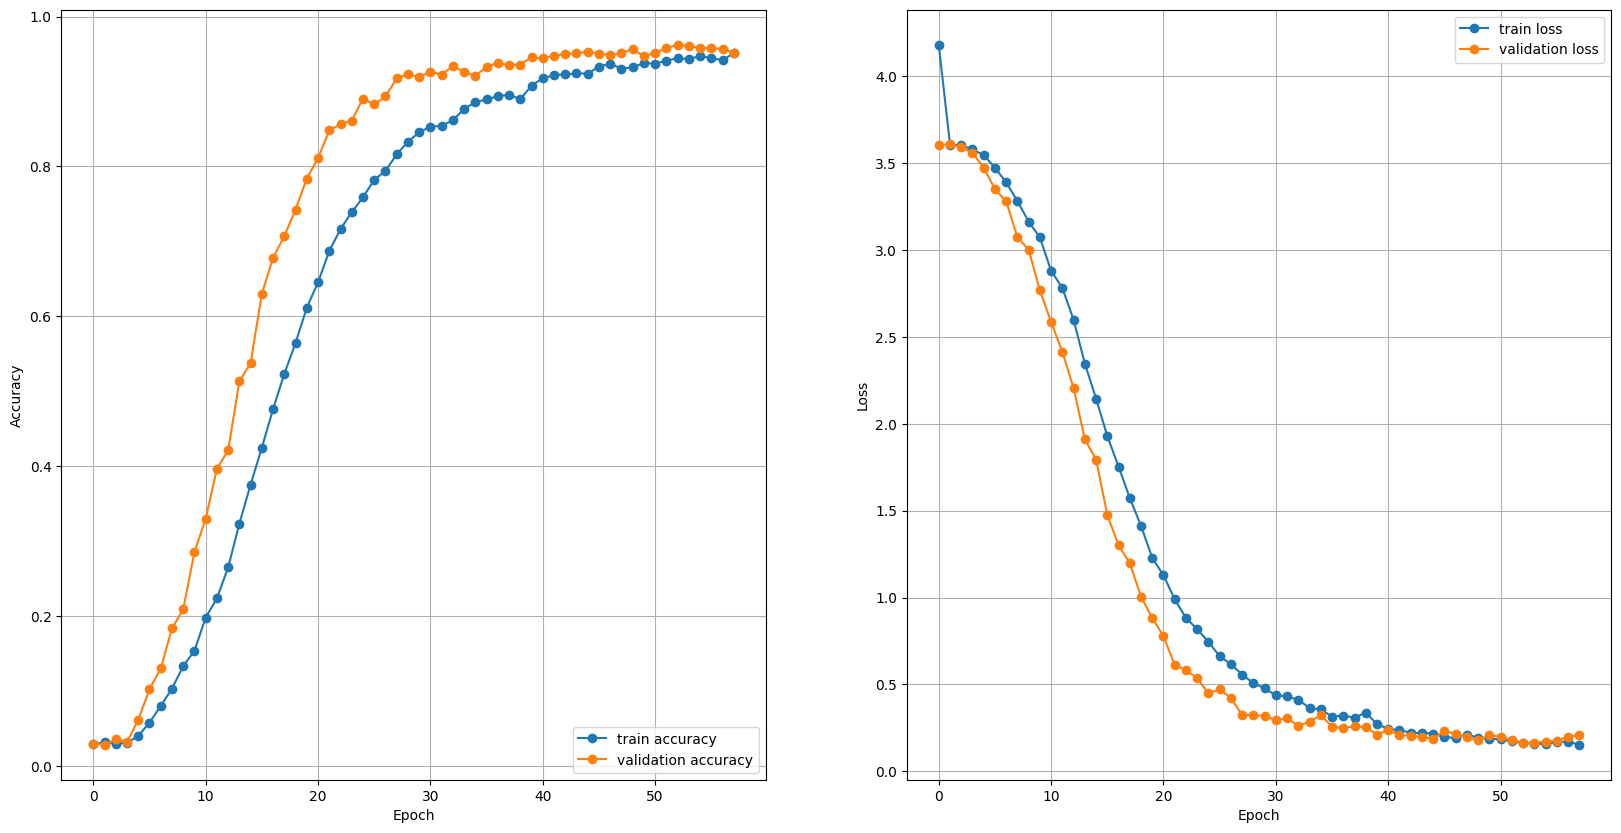

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()